In [1]:
#Import the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
#Data importation
df = pd.read_csv('/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


*DATA PREPROCESSING*

In [3]:
#Checking for missing values
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [4]:
#Checking the data types for each column
df.dtypes

PatientID                     int64
Age                           int64
Gender                        int64
Ethnicity                     int64
EducationLevel                int64
BMI                         float64
Smoking                       int64
AlcoholConsumption          float64
PhysicalActivity            float64
DietQuality                 float64
SleepQuality                float64
FamilyHistoryParkinsons       int64
TraumaticBrainInjury          int64
Hypertension                  int64
Diabetes                      int64
Depression                    int64
Stroke                        int64
SystolicBP                    int64
DiastolicBP                   int64
CholesterolTotal            float64
CholesterolLDL              float64
CholesterolHDL              float64
CholesterolTriglycerides    float64
UPDRS                       float64
MoCA                        float64
FunctionalAssessment        float64
Tremor                        int64
Rigidity                    

In [5]:
#Dropping the Doctor in charge and Patient ID variable 
df.drop(['DoctorInCharge','PatientID'], axis=1, inplace=True)

In [6]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [7]:
#Viewing the summary statistics of data
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

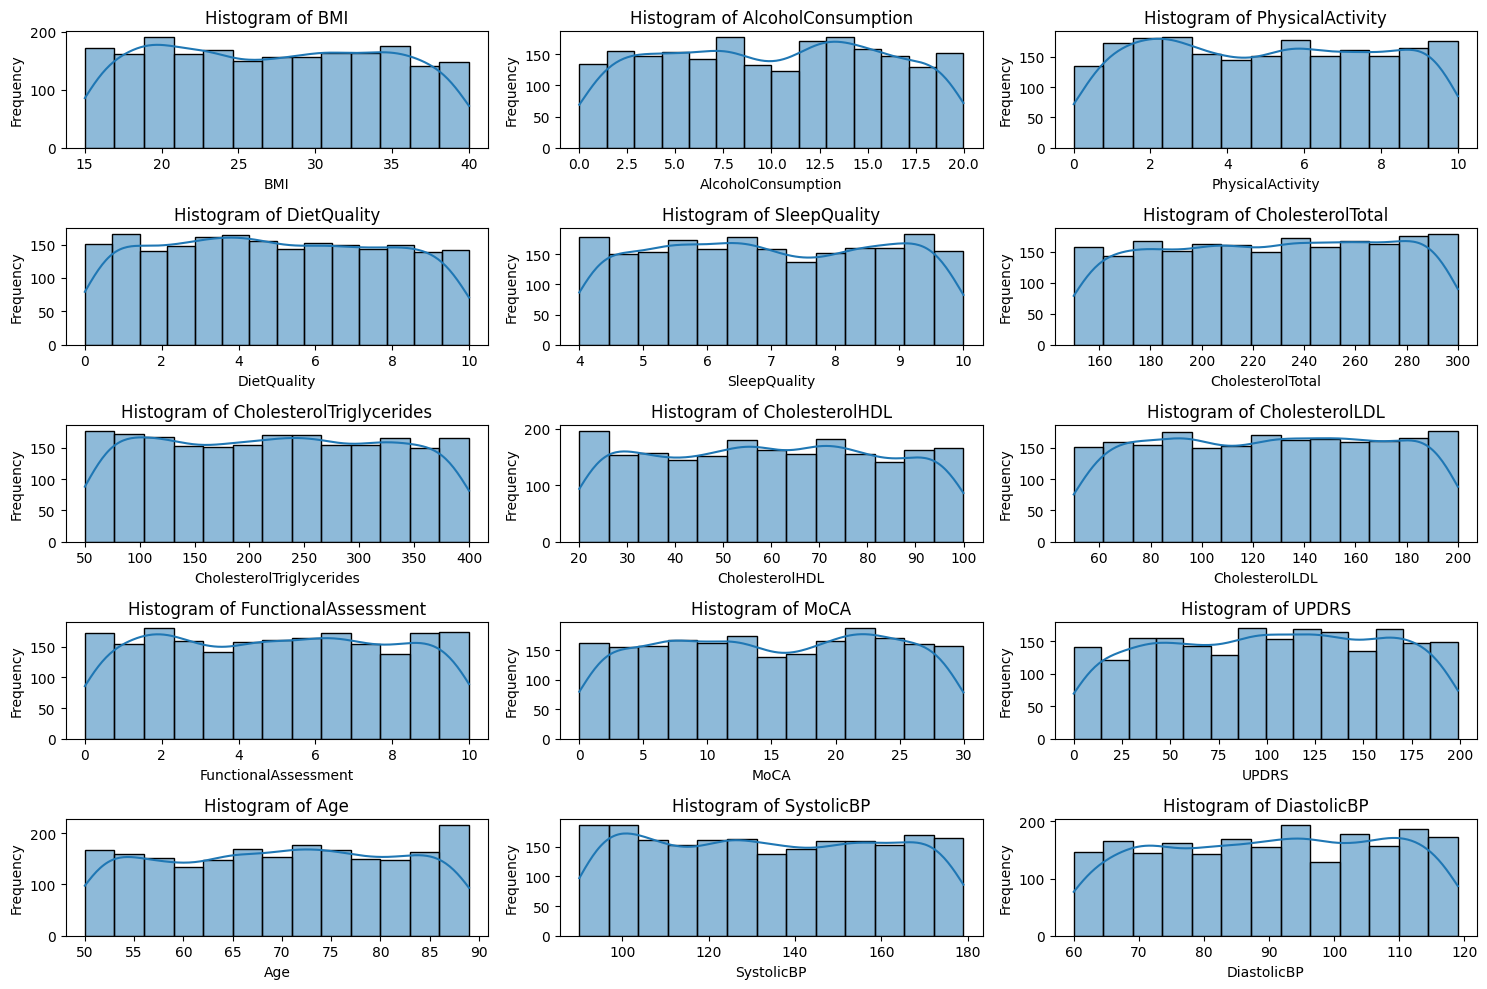

In [8]:
#Plotting the histogram plot of the continous data
# Separate columns 
continous_variables = ['BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality'
,'CholesterolTotal','CholesterolTriglycerides','CholesterolHDL','CholesterolLDL','FunctionalAssessment',
                       'MoCA','UPDRS','Age','SystolicBP','DiastolicBP']
continous_variables = df[continous_variables]
#Checking the variables distribution
plt.figure(figsize=(15, 10))
for i, column in enumerate(continous_variables.columns[:15], 1):
    plt.subplot(5, 3, i)
    sns.histplot(continous_variables[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

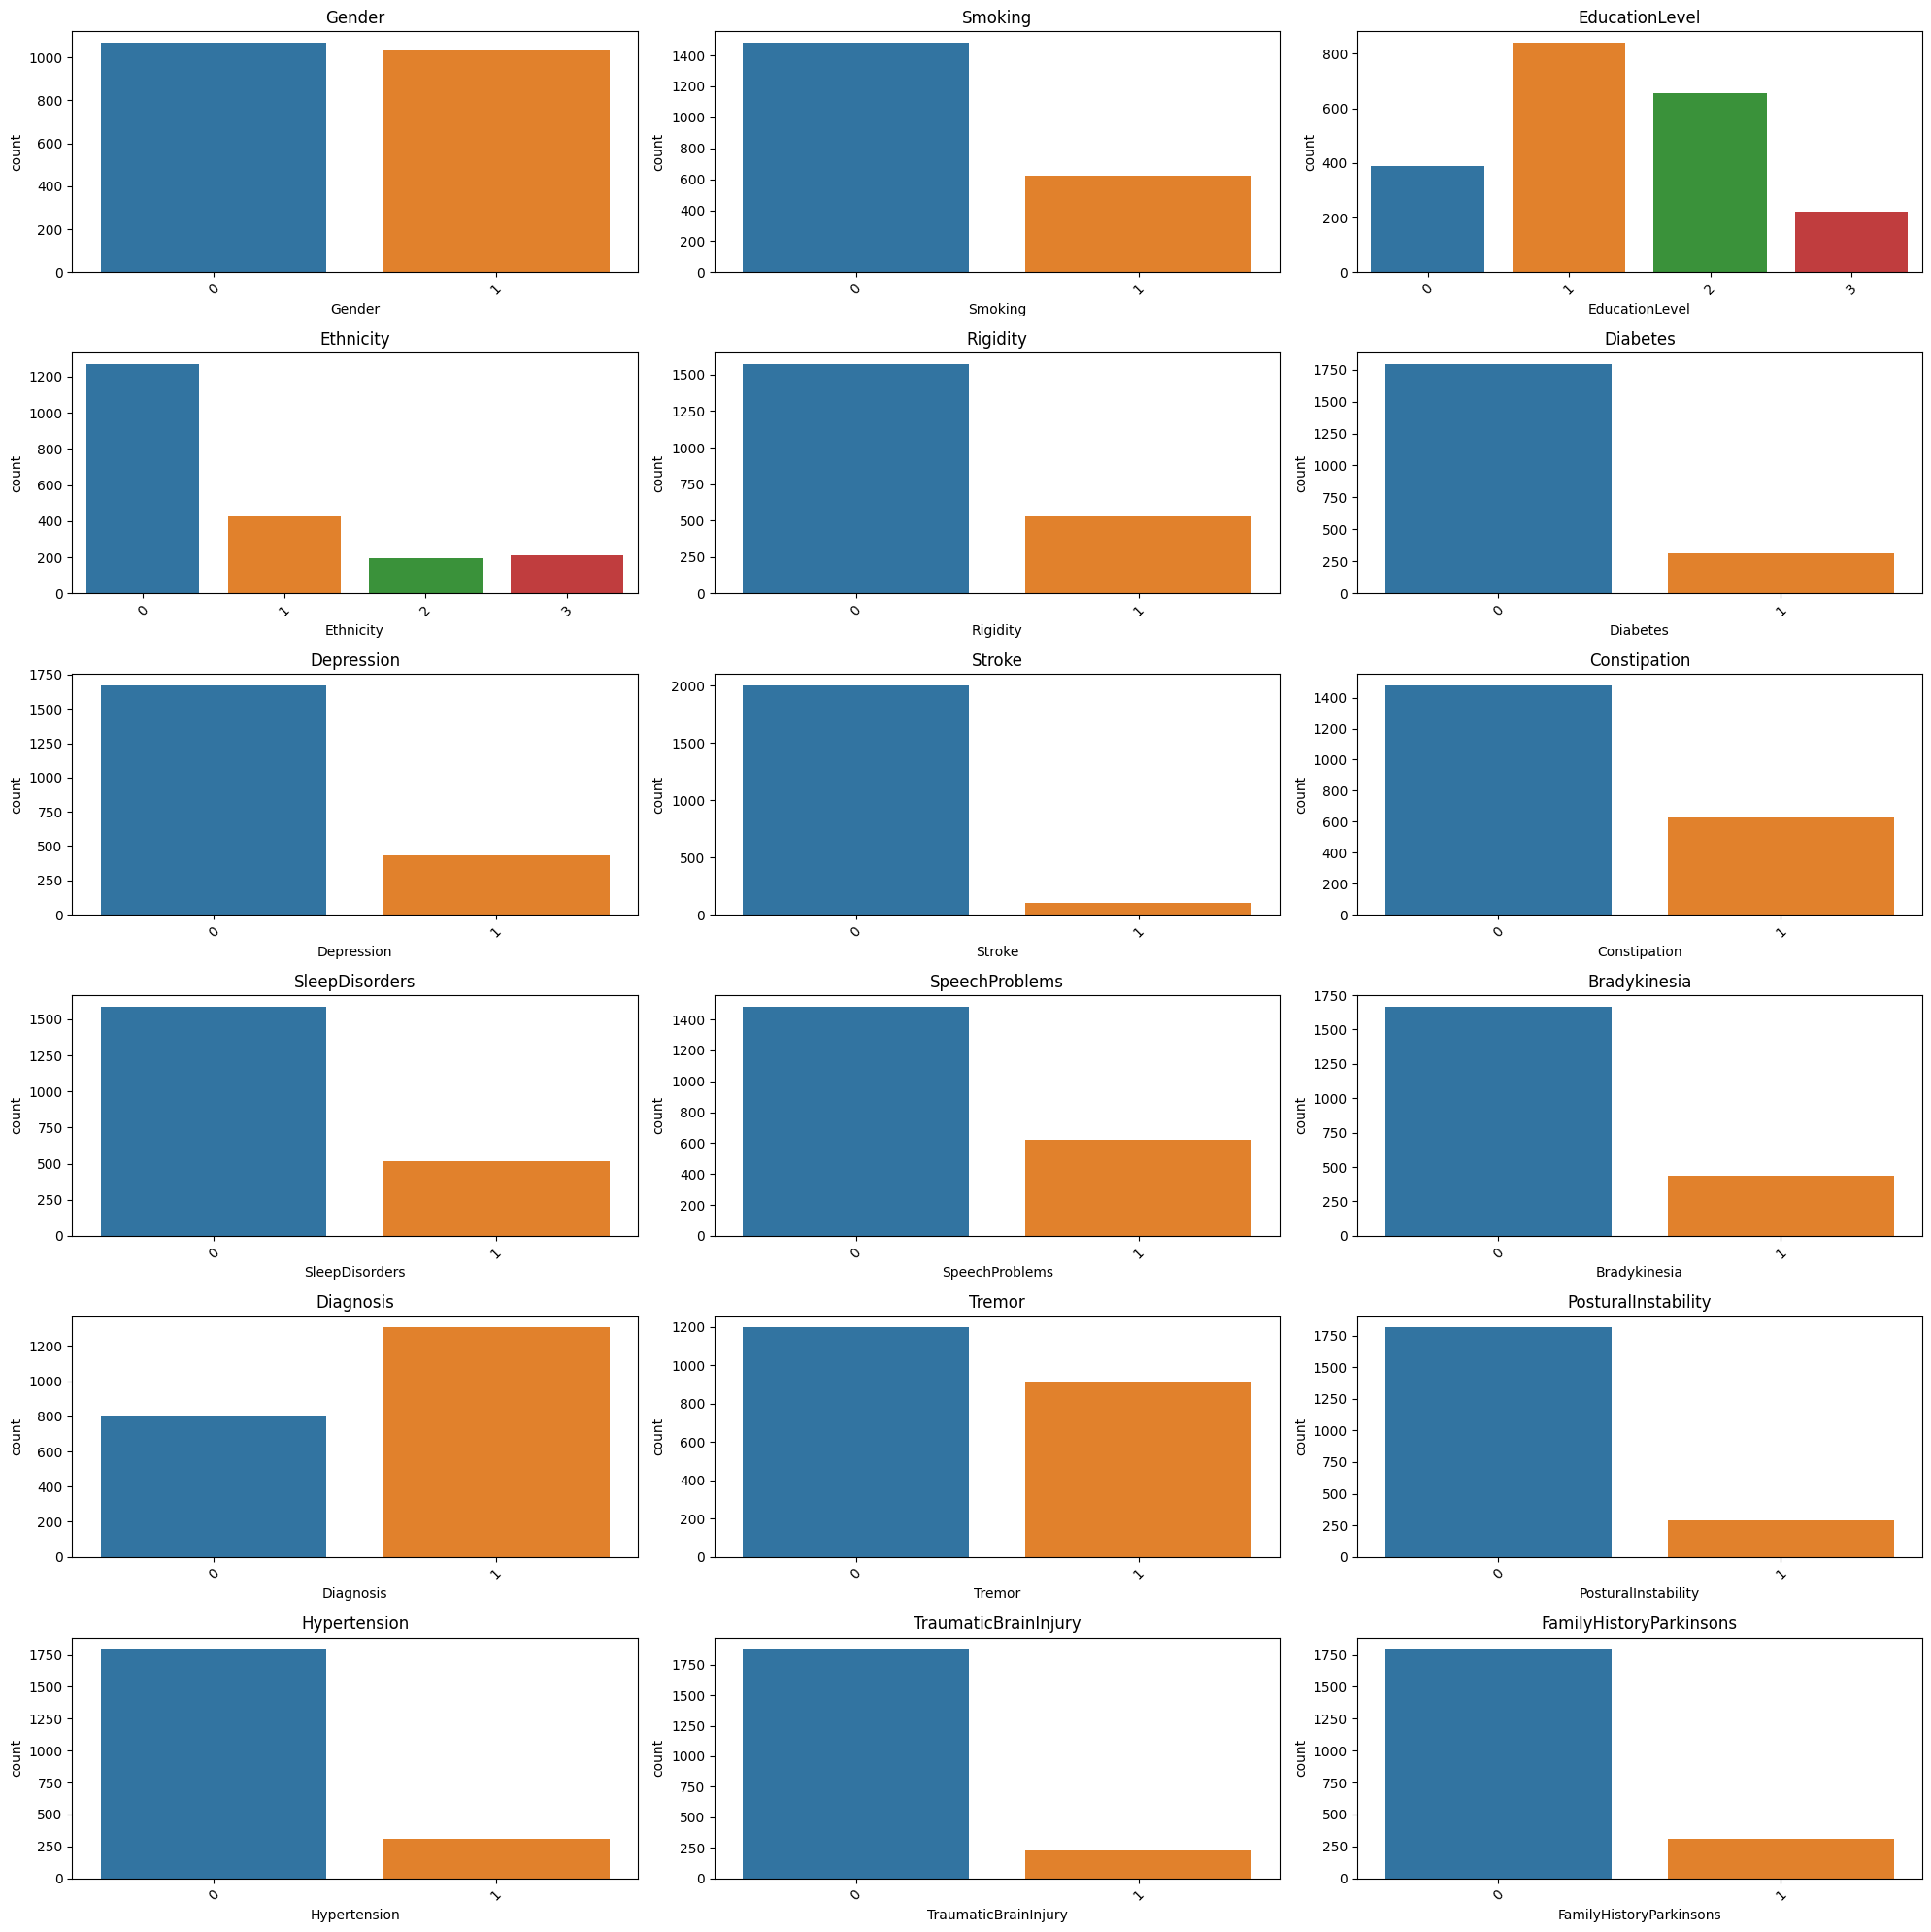

In [9]:
#Plotting the barplot of the categorical data
categorical_variables = ['Gender','Smoking','EducationLevel','Ethnicity',
                         'Rigidity','Diabetes','Depression','Stroke','Constipation',
                         'SleepDisorders','SpeechProblems','Bradykinesia',
                         'Diagnosis','Tremor','PosturalInstability','Hypertension',
                         'TraumaticBrainInjury','FamilyHistoryParkinsons']
categorical_variables = df[categorical_variables]
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_variables.columns[:18], 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=categorical_variables[column])
    plt.title(f'{column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

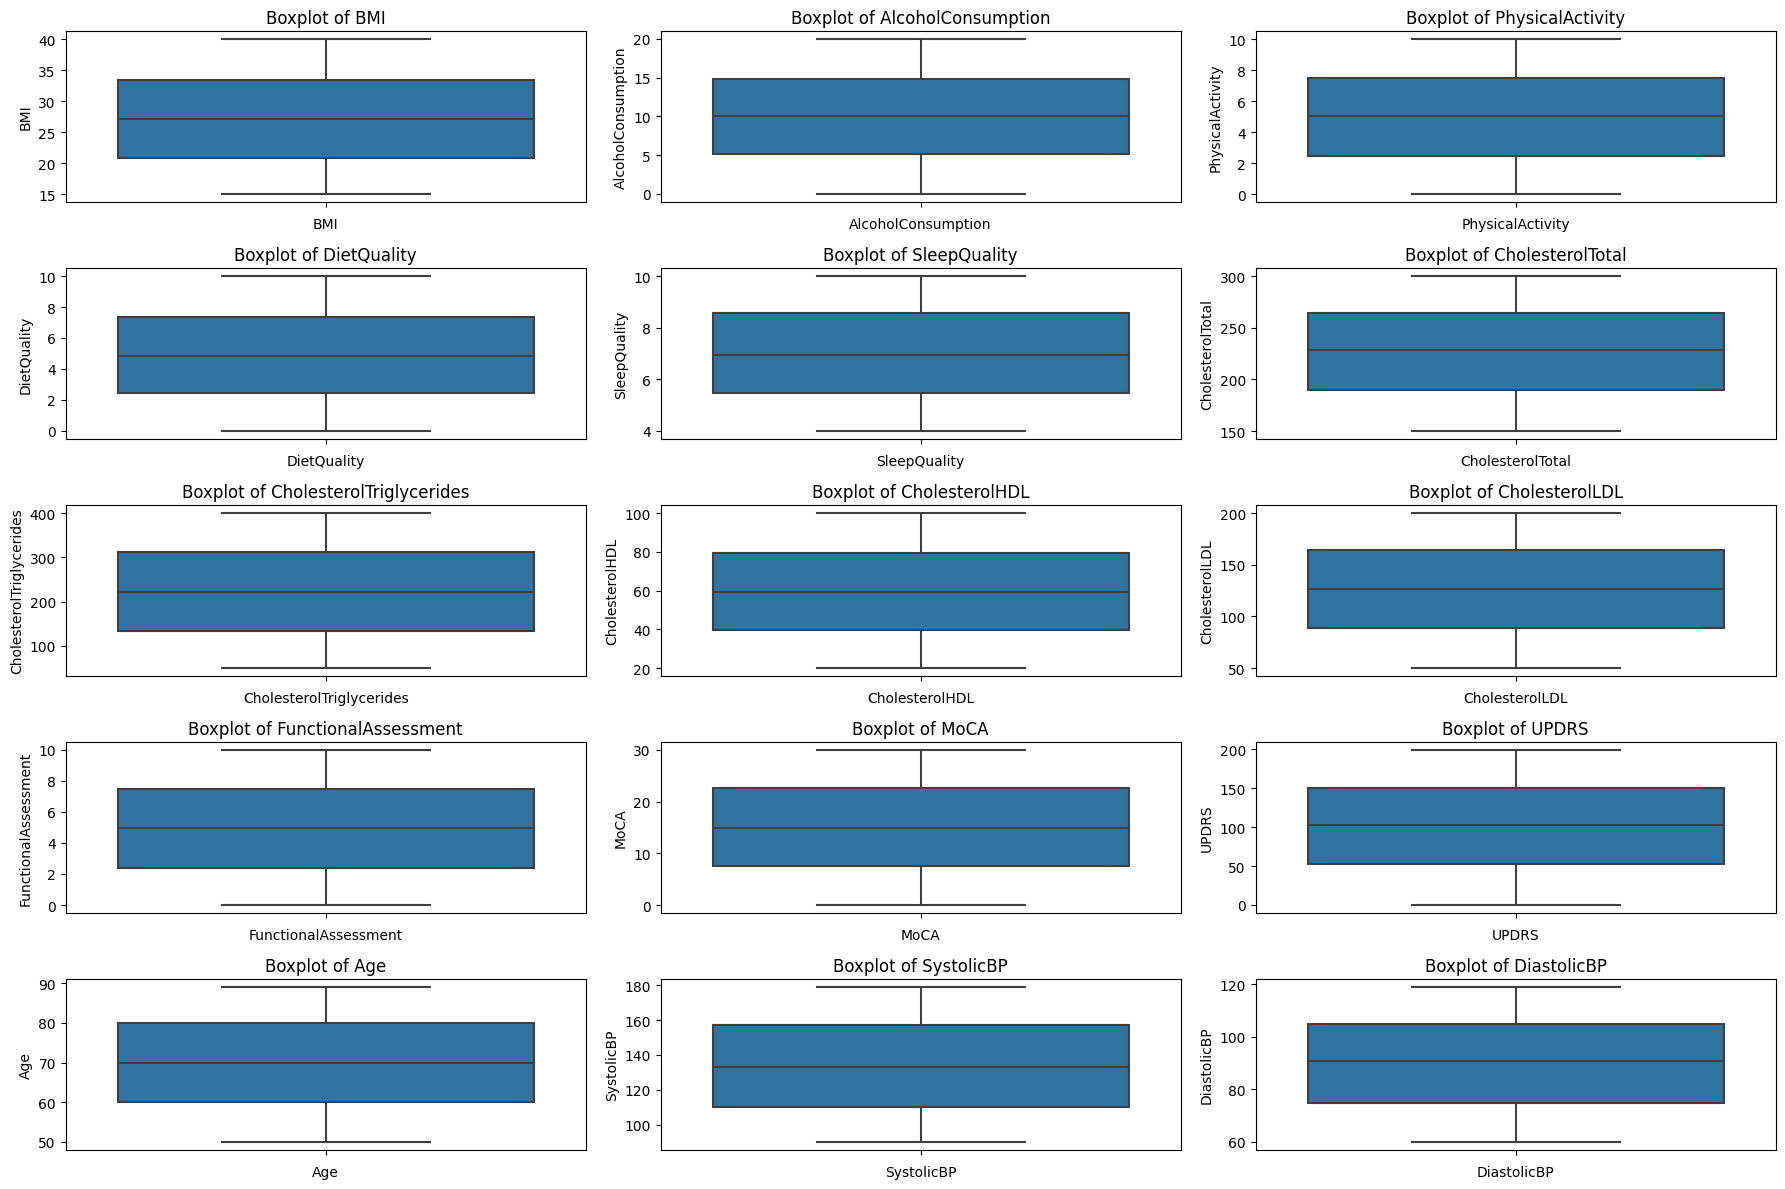

In [10]:
#Checking for outliers of the continous data
plt.figure(figsize=(18, 12))
for i, column in enumerate(continous_variables.columns[:15], 1):  # Adjust as needed
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

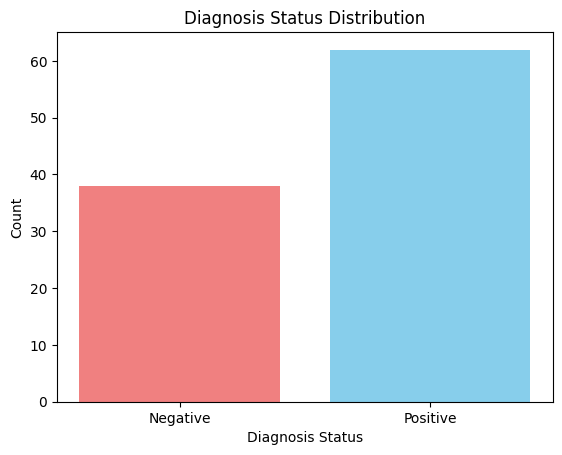

In [11]:
#Checking the distribution of the target variable
# Count occurrences of each category
counts = df['Diagnosis'].value_counts(normalize=True) * 100
# Create bar plot
plt.bar(counts.index, counts.values, color=['skyblue', 'lightcoral'])
plt.xticks([0, 1], ['Negative', 'Positive'])
# Add titles and labels
plt.title('Diagnosis Status Distribution')
plt.xlabel('Diagnosis Status')
plt.ylabel('Count')


*Observation: This shows envidence of data imbalance*

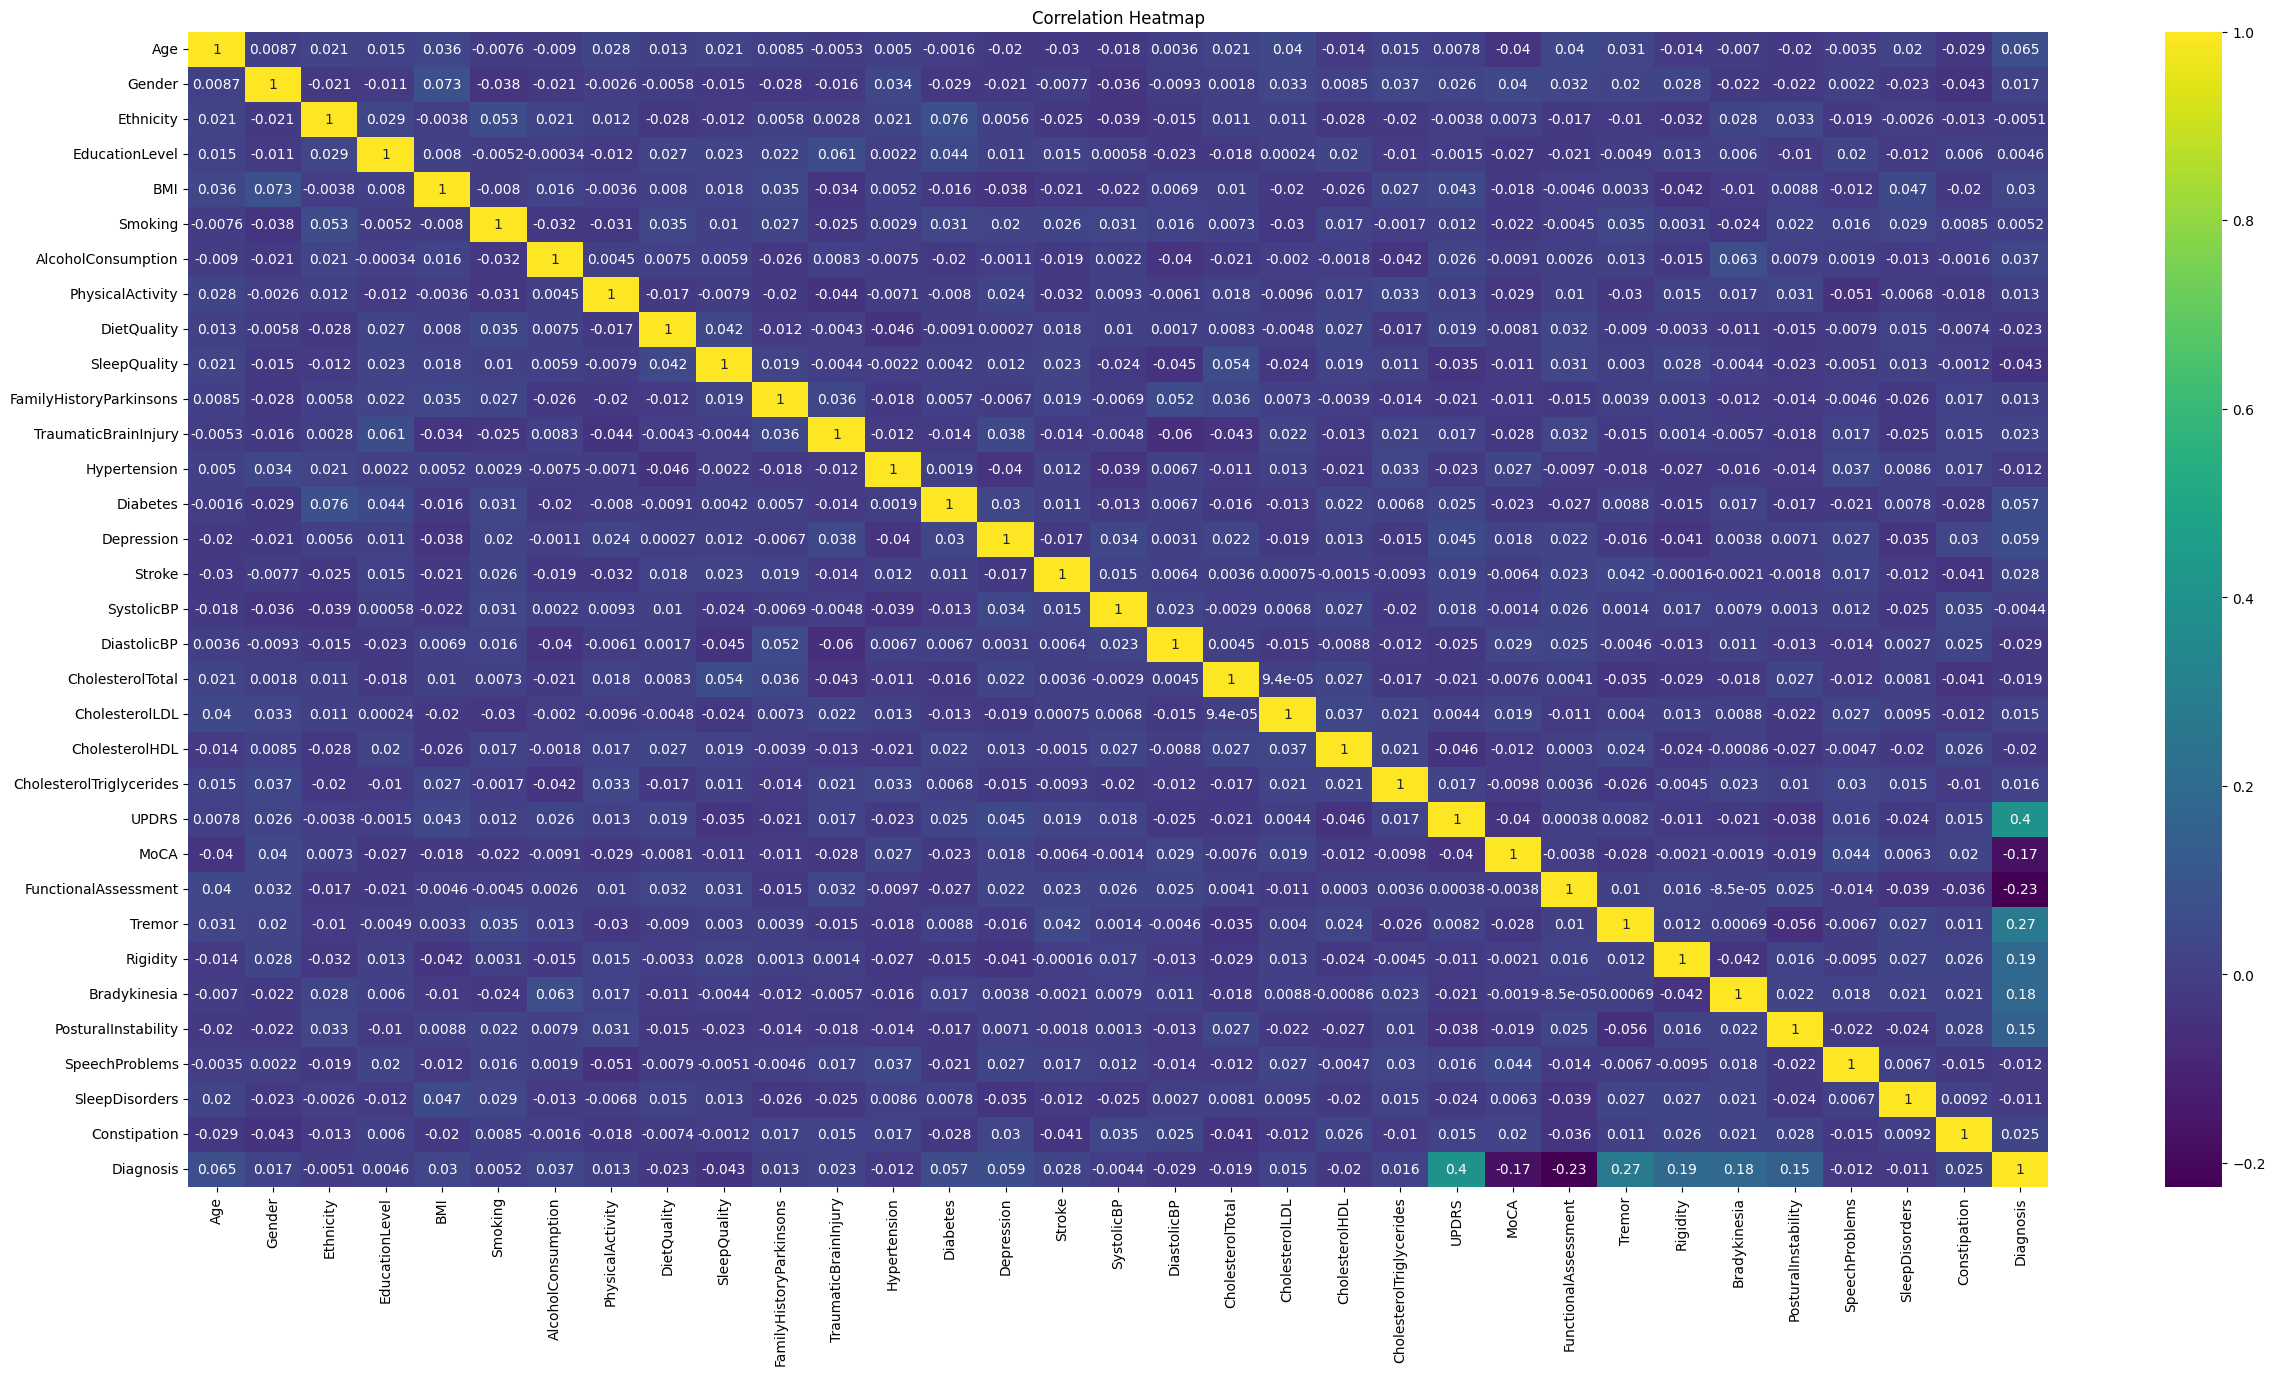

In [12]:
#Correlation plot showing the relationship between the target variable and predictor..
#...variables 
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Splitting the dataset into predictor variables (features) and the target variable
X = df.drop('Diagnosis', axis=1)   # Independent features
y = df['Diagnosis']                # Target variable (diagnosis classification)

# Initialize SMOTE with a strategy to oversample the minority class
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Displaying the shape of the resampled dataset
X_resampled.shape, y_resampled.shape

((2608, 32), (2608,))

Text(0, 0.5, 'Count')

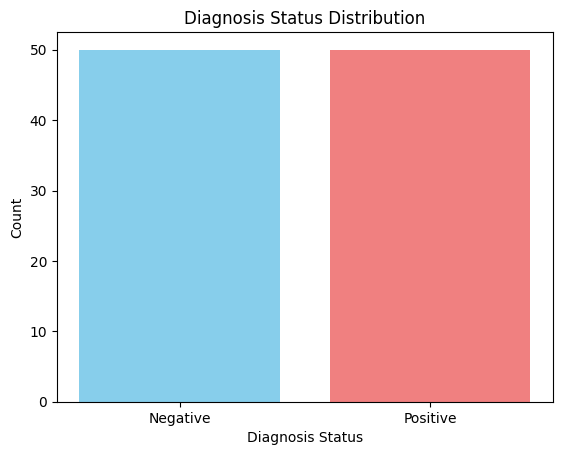

In [14]:
#Checking the distribution of the cleaned target variable
# Count occurrences of each category
counts = y_resampled.value_counts(normalize=True) * 100
# Create bar plot
plt.bar(counts.index, counts.values, color=['skyblue', 'lightcoral'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Diagnosis Status Distribution')
plt.xlabel('Diagnosis Status')
plt.ylabel('Count')

**The Data is now balanced**

*DATA SPLIT*

In [15]:
# Split the resampled dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=0.2,                # 20% of the data for testing
    random_state=42,             # Ensures reproducibility of the split
    stratify=y_resampled         # Maintains the class distribution in both sets
)

In [16]:
# Create a Random Forest Classifier model with specified parameters
rf_1 = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
# Train the model
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [17]:
#Make predictions using the trained Random Forest model on the test set
y_pred_1 = rf_1.predict(X_test)
#Calculate and display the model's accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print("Accuracy:", f"{accuracy * 100:.2f}%")


Accuracy: 91.38%


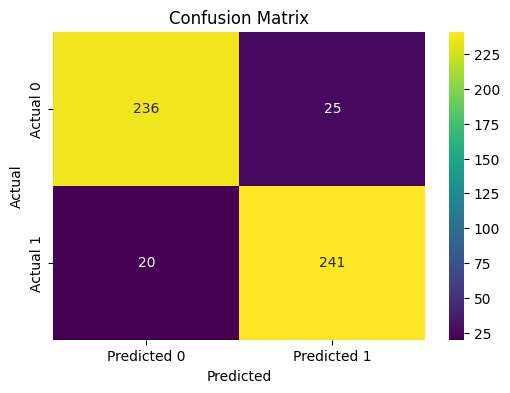

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       261
           1       0.91      0.92      0.91       261

    accuracy                           0.91       522
   macro avg       0.91      0.91      0.91       522
weighted avg       0.91      0.91      0.91       522



In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_1)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

**Model 2 :** Increasing the number of trees in the forest to 200

In [19]:
# Create a Random Forest Classifier model2 with specified parameters
rf_2 = RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
# Train the model
rf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [20]:
#Make predictions using the trained Random Forest model on the test set
y_pred_2 = rf_2.predict(X_test)
#Calculate and display the model's accuracy
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy:", f"{accuracy*100:.2f}%")

Accuracy: 90.61%


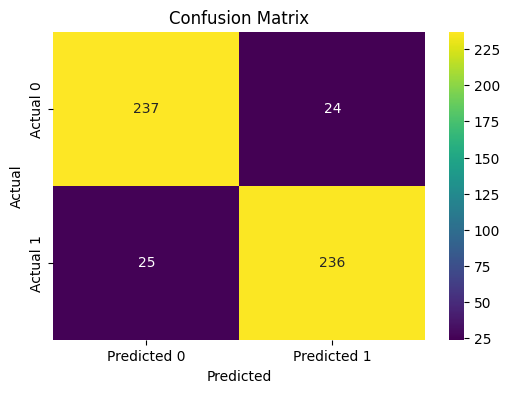

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       261
           1       0.91      0.90      0.91       261

    accuracy                           0.91       522
   macro avg       0.91      0.91      0.91       522
weighted avg       0.91      0.91      0.91       522



In [21]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_2)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Model 3

In [22]:
#Create a Random Forest Classifier model with specified hyperparameters
rf_3 = RandomForestClassifier(n_estimators=300,max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
# Train the model
rf_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

In [23]:
# Make predictions using the trained Random Forest model on the test set
y_pred_3 = rf_3.predict(X_test)
# Calculate and display the model's accuracy
accuracy = accuracy_score(y_test, y_pred_3)
print("Accuracy:", f"{accuracy*100:.2f}%")

Accuracy: 90.23%


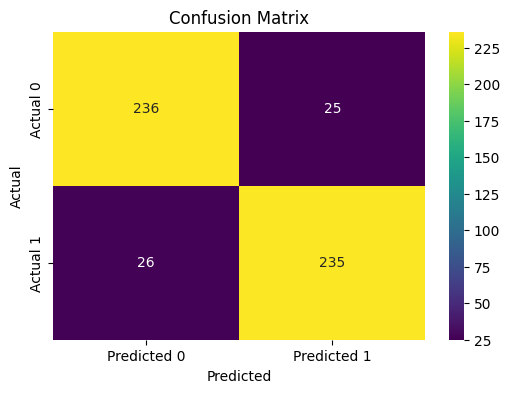

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       261
           1       0.90      0.90      0.90       261

    accuracy                           0.90       522
   macro avg       0.90      0.90      0.90       522
weighted avg       0.90      0.90      0.90       522



In [24]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_3)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Model 4

In [25]:
# Create a Random Forest Classifier model with specified hyperparameters
rf_4 = RandomForestClassifier(n_estimators=400,max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
# Train the model
rf_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=400, random_state=42)

In [26]:
# Make predictions using the trained Random Forest model on the test set
y_pred_4 = rf_4.predict(X_test)

# Calculate and display the model's accuracy
accuracy = accuracy_score(y_test, y_pred_4)
print("Accuracy:", f"{accuracy*100:.2f}%")

Accuracy: 90.42%


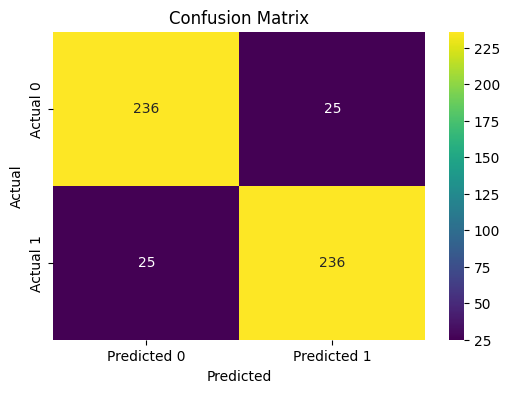

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       261
           1       0.90      0.90      0.90       261

    accuracy                           0.90       522
   macro avg       0.90      0.90      0.90       522
weighted avg       0.90      0.90      0.90       522



In [27]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_4)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_4))

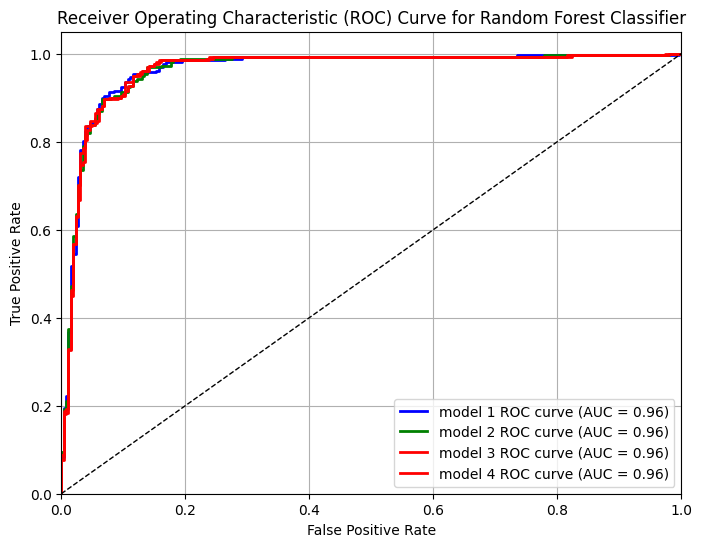

In [28]:
# Predict probabilities for ROC curve
y_pred_1 = rf_1.predict_proba(X_test)[:, 1]
y_pred_2 = rf_2.predict_proba(X_test)[:, 1]
y_pred_3 = rf_3.predict_proba(X_test)[:, 1]
y_pred_4 = rf_4.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred_1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_test, y_pred_2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, _ = roc_curve(y_test, y_pred_3)
roc_auc_3 = auc(fpr_3, tpr_3)

fpr_4, tpr_4, _ = roc_curve(y_test, y_pred_4)
roc_auc_4 = auc(fpr_4, tpr_4)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'model 1 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'model 2 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_3, tpr_3, color='red', lw=2, label=f'model 3 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_4, tpr_4, color='red', lw=2, label=f'model 4 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**USING SUPPORT VECTOR MACHINE CLASSIFIER**

In [29]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Apply the same transformation to the test data
X_test = scaler.transform(X_test)

In [30]:
# Create an SVC model with specified hyperparameters
svc_1 = SVC(
    kernel='rbf',                  # Radial Basis Function (RBF) kernel (non-linear classifier)
    C=0.0001,                      # Regularization parameter (smaller values increase regularization)
    gamma='scale',                # Kernel coefficient; 'scale' uses 1 / (n_features * X.var())
    decision_function_shape='ovr',# One-vs-Rest strategy for multiclass classification
    probability=True,             # Enable probability estimates (used for ROC/AUC)
    shrinking=True,               # Enable shrinking heuristic (default: True)
    tol=1e-3,                     # Tolerance for stopping criterion
    max_iter=-1,                 # No limit on number of iterations (-1 means run until convergence)
    random_state=42              # Seed for reproducibility
)

# Fit the SVC model on the standardized training data
svc_1.fit(X_train, y_train)

SVC(C=0.0001, probability=True, random_state=42)

In [31]:
# Make predictions on the test dataset using the trained SVC model
svc_pred1 = svc_1.predict(X_test)
# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, svc_pred1)
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 72.80%


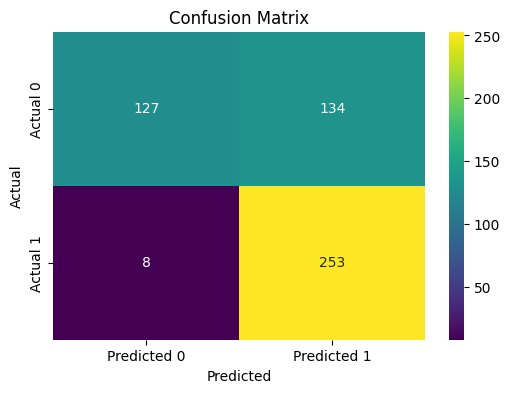

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       261
           1       0.65      0.97      0.78       261

    accuracy                           0.73       522
   macro avg       0.80      0.73      0.71       522
weighted avg       0.80      0.73      0.71       522



In [32]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred1)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred1))

USING A LINEAR KERNEL

In [33]:
# Initialize the SVC model with a linear kernel and custom hyperparameters
svc_11 = SVC(
    kernel='linear',               # Linear kernel for linearly separable data
    C=0.0001,                      # Regularization parameter; smaller values imply stronger regularization
    gamma='scale',                # Not used for linear kernel but kept for consistency
    decision_function_shape='ovr',# One-vs-Rest strategy for multiclass classification
    probability=True,             # Enable probability estimates for ROC/AUC analysis
    shrinking=True,               # Use shrinking heuristic to optimize training
    tol=1e-3,                     # Tolerance for stopping criteria
    max_iter=-1,                 # Unlimited iterations (until convergence)
    random_state=42              # Seed for reproducibility
)

# Train the linear SVC model on the standardized training data
svc_11.fit(X_train, y_train)


SVC(C=0.0001, kernel='linear', probability=True, random_state=42)

In [34]:
# Predict class labels using the trained linear SVC model
svc_pred11 = svc_11.predict(X_test)
# Calculate accuracy score on the test dataset
accuracy = accuracy_score(y_test, svc_pred11)
# Display the accuracy in percentage format
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 78.54%


Using the linear kernel for SVC outperformed the rbf kernel for a c-value = 0.0001

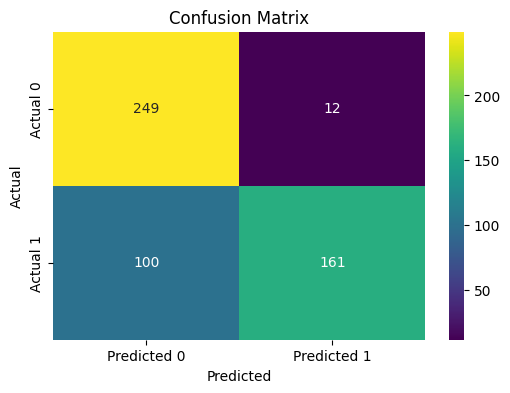

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       261
           1       0.93      0.62      0.74       261

    accuracy                           0.79       522
   macro avg       0.82      0.79      0.78       522
weighted avg       0.82      0.79      0.78       522



In [35]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred11)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred11))

Model 2 using a c= 0.001

In [36]:
# Initialize a new SVC model with RBF kernel and increased C value
svc_2 = SVC(
    kernel='rbf',                 # Radial Basis Function kernel
    C=0.001,                      # Slightly relaxed regularization compared to previous model
    gamma='scale',               # Automatically adjusts gamma based on feature variance
    decision_function_shape='ovr',
    probability=True,
    shrinking=True,
    tol=1e-3,
    max_iter=-1,
    random_state=42
)
# Fit the model on the standardized training dataset
svc_2.fit(X_train, y_train)

SVC(C=0.001, probability=True, random_state=42)

In [37]:
# Predict class labels using the trained SVC model (svc_2)
svc_pred2 = svc_2.predict(X_test)

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, svc_pred2)
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 72.80%


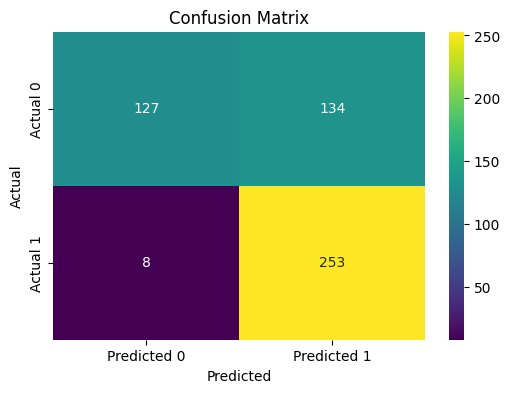

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       261
           1       0.65      0.97      0.78       261

    accuracy                           0.73       522
   macro avg       0.80      0.73      0.71       522
weighted avg       0.80      0.73      0.71       522



In [38]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred2)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred2))

Observation: The performance difference in terms of an increase using a c-value of 0.001 against 0.0001 is not significant

In [39]:
# Initialize a new linear kernel SVC with higher C
svc_21 = SVC(
    kernel='linear',              # Linear kernel assumes linear decision boundary
    C=0.001,                      # Slightly higher C allows fewer misclassifications
    gamma='scale',               # Auto-calculated gamma (not used in linear kernel)
    decision_function_shape='ovr',
    probability=True,
    shrinking=True,
    tol=1e-3,
    max_iter=-1,
    random_state=42
)

# Train the model on the standardized training data
svc_21.fit(X_train, y_train)

SVC(C=0.001, kernel='linear', probability=True, random_state=42)

In [40]:
# Predict class labels using the trained linear SVC model
svc_pred21 = svc_21.predict(X_test)
# Evaluate the model's accuracy on the test set
accuracy = accuracy_score(y_test, svc_pred21)
# Display accuracy in percentage format
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 84.67%


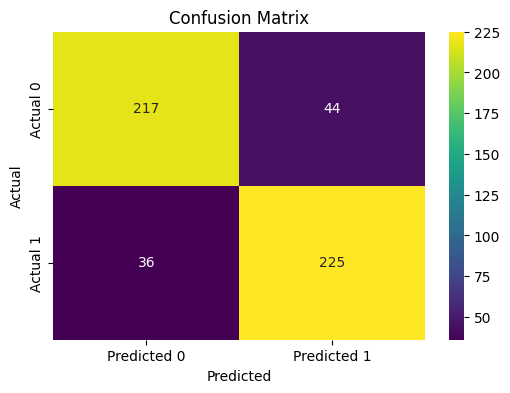

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       261
           1       0.84      0.86      0.85       261

    accuracy                           0.85       522
   macro avg       0.85      0.85      0.85       522
weighted avg       0.85      0.85      0.85       522



In [41]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred21)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred21))

Observation: The SVC linear kernel surpass the rbf kernel 14.94% in terms of accuracy. This shows that the linear kernel capture more information in terms of predicting the right class with a 84.48% of accuracy

Model 3 SVC c= 0.01

In [42]:
# Initialize SVC with RBF kernel and updated C value
svc_3 = SVC(
    kernel='rbf',
    C=0.01,
    gamma='scale',
    decision_function_shape='ovr',
    probability=True,
    shrinking=True,
    tol=1e-3,
    max_iter=-1,
    random_state=42
)

# Fit the model on the training data
svc_3.fit(X_train, y_train)

SVC(C=0.01, probability=True, random_state=42)

In [43]:
# Predict class labels on the test set using the trained SVC model
svc_pred3 = svc_3.predict(X_test)
# Calculate model accuracy
accuracy = accuracy_score(y_test, svc_pred3)
# Display accuracy in percentage format
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 72.80%


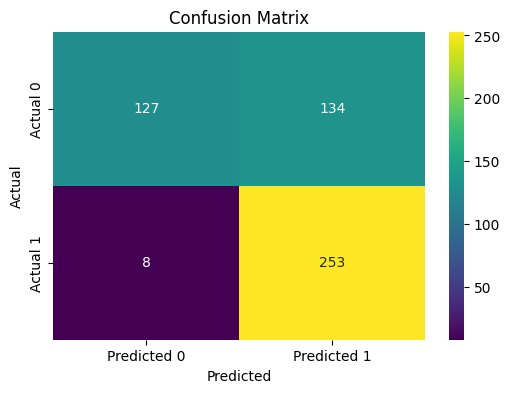

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       261
           1       0.65      0.97      0.78       261

    accuracy                           0.73       522
   macro avg       0.80      0.73      0.71       522
weighted avg       0.80      0.73      0.71       522



In [44]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred3)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred3))

In [45]:
# Initialize SVC model with a linear kernel and regularization parameter C = 0.01
svc_31 = SVC(
    kernel='linear',
    C=0.01,
    gamma='scale',
    decision_function_shape='ovr',
    probability=True,
    shrinking=True,
    tol=1e-3,
    max_iter=-1,
    random_state=42
)

# Train the model on standardized training data
svc_31.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=42)

In [46]:
# Predict labels for the test set using the trained SVC model
svc_pred31 = svc_31.predict(X_test)
# Calculate accuracy score
accuracy = accuracy_score(y_test, svc_pred31)
# Print accuracy in percentage format
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 84.67%


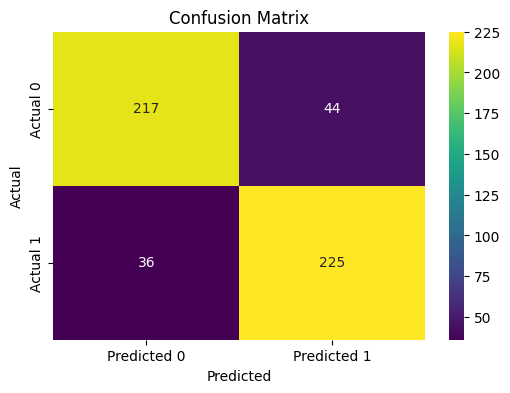

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       261
           1       0.84      0.86      0.85       261

    accuracy                           0.85       522
   macro avg       0.85      0.85      0.85       522
weighted avg       0.85      0.85      0.85       522



In [47]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred31)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred31))

Observation: With an increase in the c-value parameter, the linear kernel outperformed the rbf kernel with 15.52% difference in accuracy.


Model 4 c = 0.1

In [48]:
# Initialize SVC model with RBF kernel and C = 0.1
svc_4 = SVC(
    kernel='rbf',
    C=0.1,
    gamma='scale',
    decision_function_shape='ovr',
    probability=True,
    shrinking=True,
    tol=1e-3,
    max_iter=-1,
    random_state=42
)

# Fit the model to the training data
svc_4.fit(X_train, y_train)

SVC(C=0.1, probability=True, random_state=42)

In [49]:
# Predict on test set
svc_pred4 = svc_4.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, svc_pred4)
# Display accuracy
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 81.42%


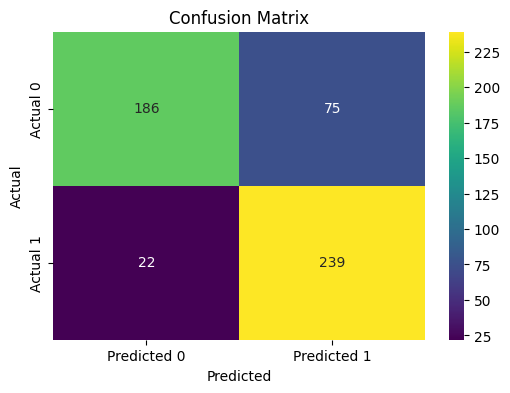

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       261
           1       0.76      0.92      0.83       261

    accuracy                           0.81       522
   macro avg       0.83      0.81      0.81       522
weighted avg       0.83      0.81      0.81       522



In [50]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred4)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred4))

In [51]:
# Initialize the SVC model with Linear kernel and C = 0.1
svc_41 = SVC(
    kernel='linear',
    C=0.1,
    gamma='scale',  
    decision_function_shape='ovr',
    probability=True,
    shrinking=True,
    tol=1e-3,
    max_iter=-1,
    random_state=42
)

# Train the model
svc_41.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [52]:
# Predict on test data
svc_pred41 = svc_41.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, svc_pred41)
# Print accuracy score
print("Accuracy:", f"{accuracy * 100:.2f}%")

Accuracy: 85.25%


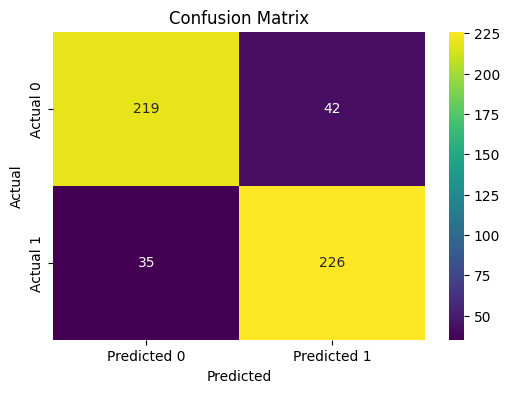

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       261
           1       0.84      0.87      0.85       261

    accuracy                           0.85       522
   macro avg       0.85      0.85      0.85       522
weighted avg       0.85      0.85      0.85       522



In [53]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, svc_pred41)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional metrics
print("Classification Report:")
print(classification_report(y_test, svc_pred41))

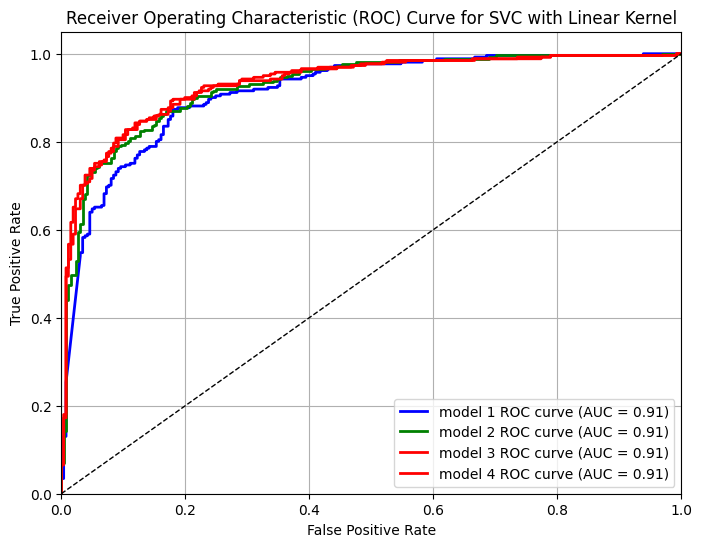

In [54]:
# Predict probabilities for ROC curve
y_pred_1 = svc_11.predict_proba(X_test)[:, 1]
y_pred_2 = svc_21.predict_proba(X_test)[:, 1]
y_pred_3 = svc_31.predict_proba(X_test)[:, 1]
y_pred_4 = svc_41.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred_1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_test, y_pred_2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, _ = roc_curve(y_test, y_pred_3)
roc_auc_3 = auc(fpr_3, tpr_3)

fpr_4, tpr_4, _ = roc_curve(y_test, y_pred_4)
roc_auc_4 = auc(fpr_4, tpr_4)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'model 1 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'model 2 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_3, tpr_3, color='red', lw=2, label=f'model 3 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_4, tpr_4, color='red', lw=2, label=f'model 4 ROC curve (AUC = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC with Linear Kernel')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()